  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

        DAY  AQI
0  01/01/70  443
1  01/02/70  501
2  01/03/70  463
3  01/04/70  642
4  01/05/70  772
5  01/06/70  293
6  01/07/70  170
7  01/08/70  481
8  01/09/70   88
9  01/10/70  231


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:31<00:00, 30.65s/it]
No handles with labels found to put in legend.


Text(0, 0.5, 'AQI Data')

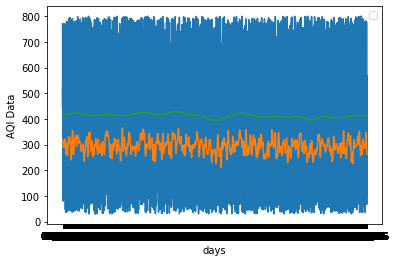

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statistics import median
%matplotlib inline
df = pd.read_csv('aqi.csv')
print(df.head(10))
def KolZur(df, data, window_size, num_iterations):                             #df is the dataframe, data can be the column
    from tqdm import tqdm                                                      #gives the info about progress of for loop
    n = len(df)                                                                #length of data base
    p = int((window_size - 1)/2)                    
    new_data = data                                                            #new list
    for iteration in tqdm(range(1, num_iterations + 1)):
        li = []                                                                #temporary list which will be updated after every iteration
        for i in range(p*iteration):
            li.append(median(new_data[:p*iteration]))                          #filling the gaps with median of the respective interval
        for i in range(p*iteration, n - p*iteration):
            total = 0 
            for ii in range(-p, p):
                total += new_data[i + ii]
            li.append(total/window_size)
        for i in range(p*iteration):
            li.append(median(new_data[-p*iteration:]))                          #same as above
        new_data = li                                                           #updating the list
    df['KolZur ' + str(window_size) + ' ' + str(num_iterations)] = new_data     #finally adding a new column
KolZur(df, df['AQI'], 15, 5)
KolZur(df, df['AQI'], 365, 3)
plt.plot(df['DAY'][5000:-5000], df['AQI'][5000:-5000])
plt.plot(df['DAY'][5000:-5000], df['KolZur 15 5'][5000:-5000])
plt.plot(df['DAY'][5000:-5000], df['KolZur 365 3'][5000:-5000])
plt.legend(loc = 'best')
plt.xlabel('days')
plt.ylabel('AQI Data')

In [2]:
df.to_csv('aqi_new.csv')